## Phase II
### What makes a health trend popular at a certain time and how can we preedict trends?

#### Group members: Arssh Bajpai, Avery Darlington, Tej Chakravarthy, Anh Nguyen

### Introduction

Health-related search behavior provides a unique glimpse into the public's evolving interests, concerns, and needs over time. For example, terms like "intermittent fasting" may spike at the start of the New Year as individuals seek weight-loss strategies, while searches for "home workout routines" often increase during colder months or global events like the COVID-19 pandemic, when outdoor activities become less feasible. Analyzing these search trends can reveal emerging health topics and how external factors, such as seasonal changes or crises, influence public health priorities. This information is invaluable for health professionals, content creators, and organizations aiming to provide timely advice, as it allows them to tailor their interventions to the most pressing health concerns. Additionally, businesses in the health and wellness sectors can gain a competitive edge by predicting future trends, ensuring they meet emerging needs. By tracking historical search patterns, stakeholders can forecast when interest in specific health topics is likely to rise, enabling proactive measures and timely support. I'm essentially interested in whether or not health trends or fads correlate to times of the year and how they are effected by external events, We can also use predictive modeling and machine learning techniques to predict future health trends based on these trends so that people could possibly see what trend could be next.

### Data Collection

I plan to use Google Trends to collect data on various health-related search terms over time, focusing on topics such as "intermittent fasting," "home workouts," and "mental health." These searches represent current public interests and concerns in the health domain, allowing me to analyze trends that are relevant to my research questions. Google Trends provides a user-friendly interface and an API through the pytrends Python library, which facilitates the retrieval of historical search data for specific keywords. After retrieving data from this API, interest score is recorded for each search term over time using the logic below, which produces the final dataframe with cleaned search term, date, interest score, year, and month columns.

In [7]:
# Import necessary libraries
from pytrends.request import TrendReq
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# Initialize Google Trends API client
pytrends = TrendReq(hl='en-US', tz=360)

# Define expanded health-related search terms to analyze
health_terms = [
    "intermittent fasting", "home workouts", "mental health", "healthy eating", "meditation",
    "anxiety relief", "yoga benefits", "keto diet", "low carb diets", "meal prep ideas",
    "stress management", "sleep quality"
]

# Setting up the empty dictionary for Trend Data
trends_dict = {'search_term': list(),
               'date': list(),
               'interest_score': list(),
               'year': list(),
               'month': list()}

# Loop through the search terms and retrieve trend data
for term in health_terms:
    # Get interest over time data for each search term
    pytrends.build_payload([term], timeframe='all')
    trends_data = pytrends.interest_over_time()

    # If trends_data is empty, skip to the next term
    if trends_data.empty:
        continue

    # Extract relevant trend data
    for index, row in trends_data.iterrows():
        trends_dict['search_term'].append(term)
        trends_dict['date'].append(row.name)
        trends_dict['interest_score'].append(row[term])
        trends_dict['year'].append(row.name.year)
        trends_dict['month'].append(row.name.month)

# Convert dictionary to DataFrame
trends_df = pd.DataFrame(trends_dict)

# Save the DataFrame to a CSV file
trends_df.to_csv('health_trends_data.csv', index=False)

print("Data has been saved to 'health_trends_data.csv'")


Data has been saved to 'health_trends_data.csv'


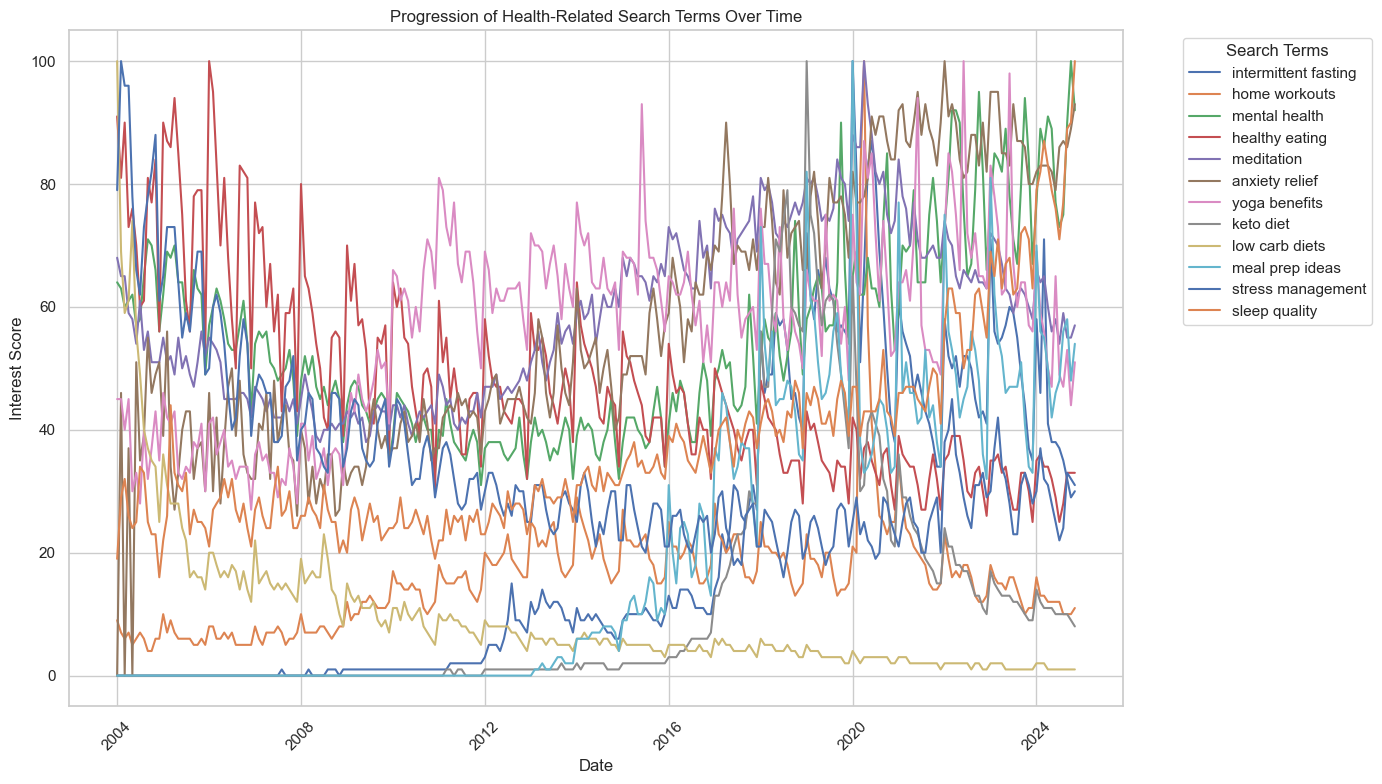

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data from the CSV file
trends_df = pd.read_csv('health_trends_data.csv')

# Convert the 'date' column to datetime format
trends_df['date'] = pd.to_datetime(trends_df['date'])

# Initialize the plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Loop through each search term and plot its progression over time
for term in trends_df['search_term'].unique():
    term_data = trends_df[trends_df['search_term'] == term]
    plt.plot(term_data['date'], term_data['interest_score'], label=term)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.title('Progression of Health-Related Search Terms Over Time')
plt.legend(title='Search Terms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Insights:
Global Events:
    - The pandemic in 2020 significantly influenced terms like home workouts and mental health, showing clear peaks during this time.

Cultural Shifts:
    - Growing awareness of holistic health practices is reflected in the rising trends for terms like meditation, stress management, and sleep quality.

Diet Trends:
    - The spikes in keto diet and low-carb diets reflect the popularity of specific dietary fads during certain years.

This graph showcases evolving health interests over time, influenced by global events, societal trends, and increased awareness of health and wellness. While some topics remain steady (like healthy eating), others see sharp peaks, reflecting temporal shifts in focus, such as home workouts during the pandemic.

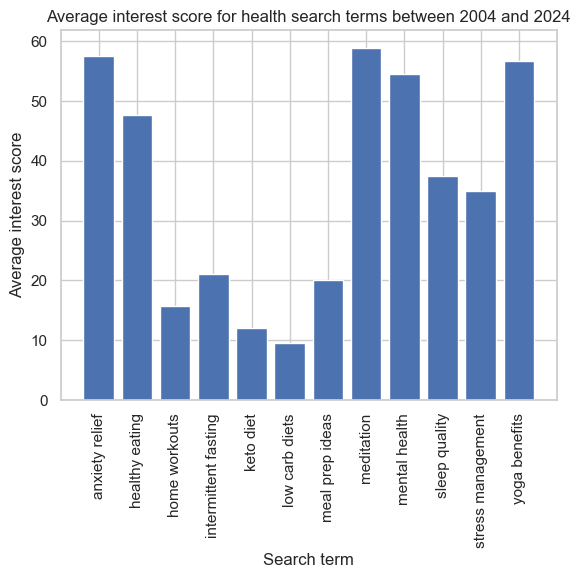

In [9]:
# For each health trend search term, calculate the average interest score over the past 20 years
overall_avg_score = trends_df.groupby("search_term")["interest_score"].mean().reset_index()

# Plot 10-year overall interest score on a bar plot
plt.bar(overall_avg_score["search_term"], overall_avg_score["interest_score"])
plt.xticks(rotation = 90)
plt.xlabel("Search term")
plt.ylabel("Average interest score")
plt.title("Average interest score for health search terms between 2004 and 2024")
plt.show()

Key Observations:

High Average Interest Scores:

    Anxiety Relief (≈ 60):
        - The highest average score, reflecting its consistent relevance over the years as people seek ways to manage anxiety.

    Meditation (≈ 55):
        - Another consistently popular topic, highlighting increased interest in mindfulness and mental wellness.

    Yoga Benefits (≈ 50):
        -  Shows strong long-term popularity, indicating yoga's entrenched role in fitness and stress management.

    Mental Health (≈ 50):
        -Represents a major focus, driven by growing awareness and societal emphasis on mental health issues.

Moderate Average Interest Scores:

    Healthy Eating (≈ 45):
        - A consistent, well-searched topic, reflecting its broad appeal and importance in health-related lifestyles.

    Stress Management (≈ 45):
        - This aligns with the increasing recognition of the impact of stress on overall health.

    Sleep Quality (≈ 40):
        - A growing area of focus in health and wellness, as more research connects sleep with physical and mental well-being.

Lower Average Interest Scores:

    Home Workouts (≈ 25):
        - Lower overall average, but likely spiked in specific periods like the COVID-19 pandemic.

    Intermittent Fasting (≈ 20):
        - A newer trend, with significant popularity spikes in recent years but not sustained across the 20 years.

    Keto Diet (≈ 15):
        - A dietary fad that saw bursts of interest but didn’t sustain widespread or long-term popularity.

    Low-Carb Diets (≈ 15):
        - Another dietary trend that saw periodic bursts of popularity but faded over time.

    Meal Prep Ideas (≈ 15):
        - Likely a more niche topic, appealing to those focused on convenience and healthy eating habits.

The first line plot helps us compare the general pattern of the interest in each health-related search terms between 2004 and 2024. From this plot, we can have a better idea of certain times in the past where specific health trends became popular, as well as compare the distribution in interest in these trends over time. The second bar plot gives us a clearer idea of which 

### Data Usage and Remaining Issues

The current health trends dataset utilizes Google Trends data to track the popularity of various health-related topics such as intermittent fasting, home workouts, mental health, healthy eating, and meditation. This data provides insights into how interest in these topics fluctuates over time, allowing for trend analysis on a daily, monthly, or yearly basis. While the dataset is useful for understanding broad patterns in public interest, there are a few remaining issues. First, Google Trends data may be influenced by region-specific biases, and without filtering by geographical location, the results might not reflect trends in specific countries or areas. Additionally, the dataset only captures relative search interest rather than actual engagement or behavior, limiting its use for deeper, action-based health insights. Lastly, data gaps (e.g., missing values for certain time periods) may affect the continuity and analysis of long-term trends, requiring careful handling of missing data during preprocessing.

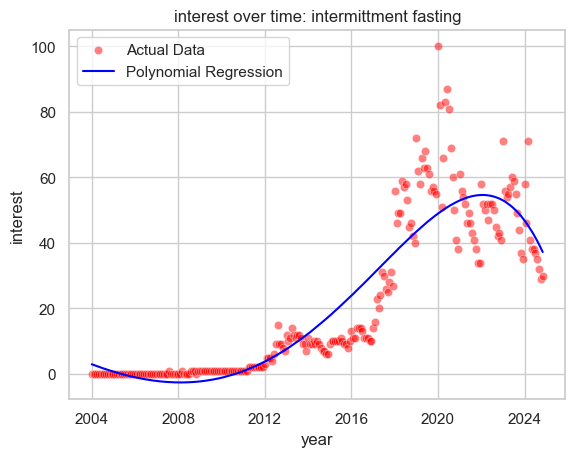

0.8370698086629726


In [17]:
def polynomial_regression(x, y, degree=6, learning_rate=0.05, iterations=15000):
    """
   calculates the polynomial regression on our data based of its gradient.
   
   args:
       x (list): time in years, X axis 
       y (list): our interest score values
       degree (int): degree of the polynomial regression 
       learning rate (float): learning rate for gradient
       iterations (int): Number of training iterations
   
   Returns:
       list: Predicted y-values using fitted polynomial curve
    """
    
    # normalizing X
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    
    # builds a features matrix 
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for int in range(iterations):

        # calculates our errors
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y)]
        
        # changes weights according to the gradient
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2/len(y)
            weights[i] -= learning_rate * gradient
            
    return [sum(w * f for w, f in zip(weights, feat)) for feat in features]

# our data
term_data = trends_df[trends_df['search_term'] == "intermittent fasting"]
x = list(range(len(term_data)))
y = list(term_data['interest_score'])

# regression
y_pred = polynomial_regression(x, y)


# building our polynomial regression visual ------------------------------------------------------------
sns.set_theme(style="whitegrid")
sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')

# regression line
plt.plot(term_data['date'], y_pred, color='blue', label='Polynomial Regression')

plt.title(f'interest over time: intermittment fasting')
plt.xlabel('year')
plt.ylabel('interest') 
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------------

# we take our avg of actual data, our total variance, squared error between pred and actual, and find r2
y_mean = sum(y) / len(y)
total_var = sum((yi - y_mean) ** 2 for yi in y)
errorPred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
r2 = 1 - (errorPred / total_var)
print(r2)

R² Value

The R² value, which is 0.8370698086629726 in this case, indicates a strong fit of the polynomial regression model to the data. This means that the model explains a significant portion of the variability in the interest over time for intermittent fasting.

Several factors likely contributed to the rising interest in intermittent fasting:

Weight Loss Benefits: Intermittent fasting has been promoted as an effective way to lose weight and reduce body fat.

Health Benefits: Research has suggested potential health benefits of intermittent fasting, such as improved insulin sensitivity, reduced inflammation, and lower risk of certain diseases.

Media Coverage: Increased media coverage of intermittent fasting, including popular diets and celebrity endorsements, has raised awareness and fueled interest.

Social Media Influence: Social media platforms have played a significant role in spreading information and trends related to intermittent fasting.
It's important to note that while intermittent fasting can be beneficial for some people, it may not be suitable for everyone.

Intermittent fasting is one of many newer opular social media health trends in recent years thanks to social media. explaining the rise in popularity, especially around 2020 when more people in general began caring more about their health and began wanting to lose weight that shows the peak of popularity of this search term.

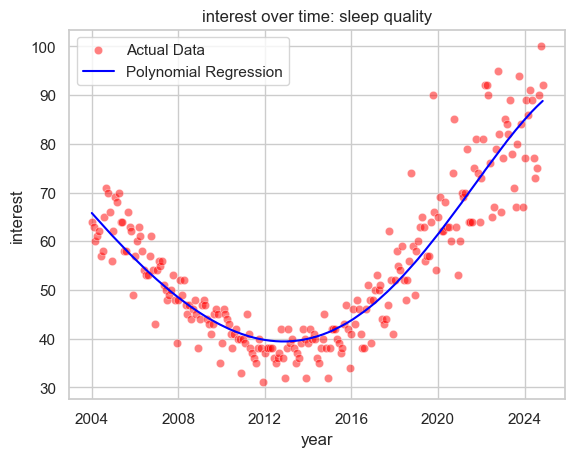

0.8539705169910539


In [11]:
def polynomial_regression(x, y, degree=6, learning_rate=0.05, iterations=15000):
    """
   calculates the polynomial regression on our data based of its gradient.
   
   args:
       x (list): time in years, X axis 
       y (list): our interest score values
       degree (int): degree of the polynomial regression 
       learning rate (float): learning rate for gradient
       iterations (int): Number of training iterations
   
   Returns:
       list: Predicted y-values using fitted polynomial curve
    """
    
    # normalizing X
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    
    # builds a features matrix 
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for int in range(iterations):

        # calculates our errors
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y)]
        
        # changes weights according to the gradient
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2/len(y)
            weights[i] -= learning_rate * gradient
            
    return [sum(w * f for w, f in zip(weights, feat)) for feat in features]

# our data
term_data = trends_df[trends_df['search_term'] == "mental health"]
x = list(range(len(term_data)))
y = list(term_data['interest_score'])

# regression
y_pred = polynomial_regression(x, y)


# building our polynomial regression visual ------------------------------------------------------------
sns.set_theme(style="whitegrid")
sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')

# regression line
plt.plot(term_data['date'], y_pred, color='blue', label='Polynomial Regression')

plt.title(f'interest over time: {term}')
plt.xlabel('year')
plt.ylabel('interest') 
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------------

# we take our avg of actual data, our total variance, squared error between pred and actual, and find r2
y_mean = sum(y) / len(y)
total_var = sum((yi - y_mean) ** 2 for yi in y)
errorPred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
r2 = 1 - (errorPred / total_var)
print(r2)

R² Value

The R² value, which is 0.8539705169910539 in this case, indicates a strong fit of the polynomial regression model to the data. This means that the model explains a significant portion of the variability in the interest over time for sleep quality.

Additional Considerations

Seasonal Variations: It's possible that there are seasonal variations in sleep quality search trends, with peaks during periods of stress or changes in daylight hours.
Regional Differences: The graph likely represents global trends. Regional variations in sleep habits and cultural attitudes towards sleep could influence search trends.
Conclusion

The graph demonstrates a clear and significant increase in interest in sleep quality over time. The general downward parabola of the graph can be explained by the rise of technological sleep tracking devices like apple watches and smart devices which given the greater ability to track sleep may have caused far greater increased interest in the topic.

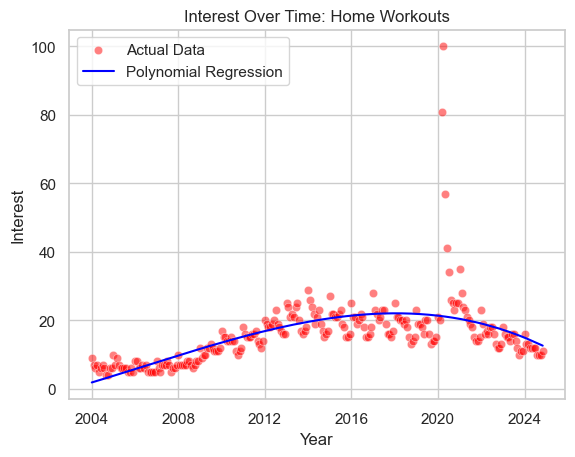

{0.3759376562070753}


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def polynomial_regression(x, y, degree=3, learning_rate=0.05, iterations=15000):
    """
    Fits a polynomial regression using gradient descent.

    Args:
        x (list): Independent variable (time in years, X-axis).
        y (list): Dependent variable (interest scores).
        degree (int): Degree of the polynomial.
        learning_rate (float): Learning rate for gradient descent.
        iterations (int): Number of training iterations.

    Returns:
        list: Predicted y-values using the fitted polynomial curve.
    """
    # Normalize X and Y
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    y_norm = [(val - min(y)) / (max(y) - min(y)) for val in y]
    
    # Feature matrix
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for _ in range(iterations):
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y_norm)]
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2 / len(y_norm)
            weights[i] -= learning_rate * gradient
    
    # Rescale predictions
    y_pred_norm = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
    y_pred = [yp * (max(y) - min(y)) + min(y) for yp in y_pred_norm]
    return y_pred

try:

    # Filter the data for the search term 'home workouts'
    term_data = trends_df[trends_df['search_term'] == "home workouts"]

    # Ensure term_data has data
    if term_data.empty:
        raise ValueError("No data available for the search term 'home workouts'.")

    # Prepare x and y
    x = list(range(len(term_data)))  # Generate sequential indices as x
    y = list(term_data['interest_score'])  # Extract interest_score as y

    # Ensure x and y are non-empty
    if not x or not y:
        raise ValueError("x or y is empty. Check the data filtering step.")

    # Perform regression
    y_pred = polynomial_regression(x, y, degree=3)

    # Visualization
    sns.set_theme(style="whitegrid")
    sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')
    plt.plot(term_data['date'], y_pred, color='blue', label='Polynomial Regression')
    plt.title(f'Interest Over Time: Home Workouts')
    plt.xlabel('Year')
    plt.ylabel('Interest')
    plt.legend()
    plt.show()

    # Calculate R^2
    y_mean = sum(y) / len(y)
    total_var = sum((yi - y_mean) ** 2 for yi in y)
    error_pred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
    r2 = 1 - (error_pred / total_var)
    print({r2})

except Exception as e:
    print(f"An error occurred: {e}")


The graph shows that there has been a general upward trend in interest in home workouts over the years. The polynomial regression curve captures this trend and provides a smooth approximation of the data. However, the R² value indicates that the model's fit is not perfect, and there's still a significant portion of the variability in the data that the model doesn't account for.

The R^2 rating shows that this model has a very large amount of variability it doesnt account for. I think this is attributed to the spike in 2020 for searches of home workouts as this was the start of the Covid-19 pandemic. However overall our regression assessment is accurate accounting for regular search rates and not extraneous global events.
